<a href="https://colab.research.google.com/github/wamaithaNyamu/RUNDAHOUSES/blob/master/Runda_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# INTRODUCTION

Runda is a surburb in the heart of Nairobi. Its an estate of the who is who in the country. Due to the status quo of the class of citizens that live here, it is exepected that the price of land and houses are off the roof (well, from the common mwananchis perspective anyway). This notebook walks through investigating housing prices in Runda. The data has been scrapped from [BuyRentKenya](https://www.buyrentkenya.com/houses-for-sale/westlands/runda?page=1). Download the csv from [here]() .Find a step by step tutorial for the webscrapping [here]().



# LOAD THE DATA

First import the necessary libraries

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We load the data from the csv file runda_houses.csv and convert it to a dataframe

In [ ]:
df = pd.read_csv('/content/runda-houses.csv')
df.head(2)

,_id,url,__v,area,baths,beds,cars,description,externalFeatures,generalFeatures,internalFeatures,price
0,5f5d1a3e1e441dbaa36b1273,https://www.buyrentkenya.com/listings/6-bed-ho...,0,2428,8,6,0,\n6 bedroom houseAll rooms en-suiteSitting on ...,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],85000000
1,5f5d1a3f1e441dbaa36b132c,https://www.buyrentkenya.com/listings/4-bed-ho...,0,6001,3,4,0,\nUnbelievable!!Yet a unique house with charac...,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",75000000


In [ ]:
df.tail(2)

,_id,url,__v,area,baths,beds,cars,description,externalFeatures,generalFeatures,internalFeatures,price
140,5f5d202b1e441dbaa36e9b15,https://www.buyrentkenya.com/listings/5-bed-ho...,0,0,0,5,0,\nIts a magnificent 5bdrm unfurnished ambassad...,[],[],[],140000000
141,5f5d202c1e441dbaa36e9b93,https://www.buyrentkenya.com/listings/6-bed-to...,0,0,7,6,0,\n6 Bedroom Ambassadorial House for saleAll en...,[],[],[],0


# DATA CLEANING

The data needs alot of cleaning inorder to be useful for analysis. Some values are NaN while others are None. The features are also in form of lists and some are also missing. 

### Drop unnecesaary columns

We do not need the url , _id, and the _v columns so we will drop them for they only add clutter to he data we have

In [ ]:
# drop columns

df =df.drop(['_id', 'url', '__v'], axis=1)
df.head(2)

,area,baths,beds,cars,description,externalFeatures,generalFeatures,internalFeatures,price
0,2428,8,6,0,\n6 bedroom houseAll rooms en-suiteSitting on ...,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],85000000
1,6001,3,4,0,\nUnbelievable!!Yet a unique house with charac...,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",75000000


In [ ]:
df.isna().sum()

area                0
baths               0
beds                0
cars                0
description         0
externalFeatures    0
generalFeatures     0
internalFeatures    0
price               0
dtype: int64

In [ ]:
df.describe()

,area,baths,beds,cars,price
count,142.000000,142.000000,142.000000,142.000000,1.420000e+02
mean,3313.683099,4.612676,4.964789,0.464789,1.106027e+08
std,25400.116125,2.172845,1.013469,1.335080,6.002568e+07
min,0.000000,0.000000,3.000000,0.000000,0.000000e+00
25%,0.000000,4.000000,4.000000,0.000000,7.500000e+07
50%,1113.000000,5.000000,5.000000,0.000000,9.500000e+07
75%,2024.000000,6.000000,5.000000,0.000000,1.500000e+08
max,303525.000000,9.000000,8.000000,10.000000,2.600000e+08


The dataset has a lot of missing values. We need to work with data that is complete or drop those that have few missing values. We check for zeros per column. In our webscraping we assigned a zero to any feature that was not listed. However, the missing data can be most likely found in the  description. 

In [ ]:
# Get number if zeros per column
df.isin([0]).sum()

area                 56
baths                19
beds                  0
cars                120
description           0
externalFeatures      0
generalFeatures       0
internalFeatures      0
price                 3
dtype: int64

The cars column seems to have the most missing values. Followed by area. The price and beds are the most useable in the dataset. A look at the sixth home in the df . The area was not given by the agency but it can be found in the description.

In [ ]:
# Make a df with only the sixth house

df1 = df.iloc[5,].copy() 
df1

area                                                             2023
baths                                                               8
beds                                                                8
cars                                                                0
description         \nThis is a newly built prime property located...
externalFeatures    [' Balcony ', ' Bore Hole ', ' Electric Fence ...
generalFeatures     [' Backup Generator ', ' CCTV ', ' Electricity...
internalFeatures    [' Aircon ', ' Alarm ', ' Built in Cupboards '...
price                                                       150000000
Name: 5, dtype: object

In [ ]:
# The area can be seen in the description

df1['description']

"\nThis is a newly built prime property located in Runda estate. It's eight bedrooms all ensuite house modern home. Situated on a half an acre. Spacious rooms and fitted with modern amenities and facilities. Back up generator, locable garage, DSQ and swimming pool. Security systems enhanced and electrified fence all round. For more information kindly contact us.\n"

From the above, you can see that the area is in the description. As such it warrants extraction of missing values in the dataset.

### Cleaning the description

The description has some elements that do not add to the importance of the tesxt. We will remove the following as part of our preprocessing:

*  paragraph numbers
* trailing new line (\n).
* apostrophes
* commas
* hyphens
* add space between words with caps

In [ ]:
# cleaning
def clean_description(text):
  """
  args text {String} the description of the current house
  return text {String} returns a string of the preprocessed description
  
  """
  pattern = re.compile(r'((?<=[^\W[A-Z])[A-Z]|(?<=\S)[A-Z](?=[a-z]))')
  # removing paragraph numbers
  text = re.sub('[0-9]+.\t','',str(text))
  # removing new line 
  text = re.sub('\n ','',str(text))

  text = re.sub('\\n',' ',str(text))
  # removing apostrophes
  text = re.sub("'s",'',str(text))
  # removing commas
  text = re.sub(",",'',str(text))
  # remove astreisk
  # text = re.sub("*",'',str(text))
  # removing hyphens
  text = re.sub("-",' ',str(text))
  text = re.sub("— ",'',str(text))
  # add space between words with caps
  text = pattern.sub(r' \1', str(text))
 

  
  
  return text

Clean the description in the dataframe and store it as clean_description

In [ ]:
df['clean_description'] = df['description'].apply(clean_description)


In [ ]:
df.head(2)

,area,baths,beds,cars,description,externalFeatures,generalFeatures,internalFeatures,price,clean_description
0,2428,8,6,0,\n6 bedroom houseAll rooms en-suiteSitting on ...,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],85000000,6 bedroom house All rooms en suite Sitting on...
1,6001,3,4,0,\nUnbelievable!!Yet a unique house with charac...,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",75000000,Unbelievable!! Yet a unique house with charac...


In [ ]:
df['clean_description'][15]

' RUNDA Selling this magnificent 6 bedroom Palatial home with all bedrooms ensuite plus Servant quarter brand new has TV roomfamily room gymwalk in closet for the master bedroom steam bathsauna in the Quiet and Leafy heart of Runda. Sitting on half acre with swimming pool Asking price is kes 210million slightly negotiable. Contact us on show me or show me for more information. '

The clean description also contains text in shortform such as No. to mean number, we need to replace this so as to have a consistent and correct parts of speech tag.

In [ ]:
def replace_shortforms(text):
  """
  args text {String} the description of the current house
  return text {String} returns a string of the preprocessed description after shortforms have been replaced
  
  """
  text = text.replace('N0.', ' ')
  text = text.replace("No.", " ")
  text = text.replace('no.', ' ')
  text = text.replace('NO.', '')

  return text

In [ ]:
df['clean_description'] = df['clean_description'].apply(replace_shortforms)

In [ ]:
df['clean_description'][1]

' Unbelievable!! Yet a unique house with character in the after lush of Runda area. It comes with 4   bedrooms 2  ensuite in a quiet neighborhood. Salient features include: Entrance Lounge with functional fire place Dining area  Common cloak room Guest ensuite bedroom with ample ward robesshowersink basin and dressing mirror FIRST FLOOR LEVEL: 2 sharing bedrooms with ample wardrobesshowersink basin and dressing mirror Master ensuite bedroom with ample walk in closetscubicle showersink basin and dressing mirror EXTERNAL FEATURES: Dhobi area Manicured lawn with talk trees and branches  Secured by perimeter wall Sufficient water tanks for storage This is a gold minea place to be for few investors with high value returns.GRAB OPPORTUNITY!! '

We split the description into sentences

In [ ]:
def split_to_sentence(text):
  # split sentences and questions
    text = re.split('[.?]', text)
    clean_sent = []
    for sent in text:
        clean_sent.append(sent)
    return clean_sent

In [ ]:
df['clean_description'] = df['clean_description'].apply(split_to_sentence)

In [ ]:
df['clean_description'][6]

[' 5 Bedroom Home For Sale This gorgeous property located in the heart of Runda along Runda Drive sits on 1',
 '2 acres   a short driving distance from the UN',
 ' The property features 5 bedrooms which are all en suite with built in wardrobes',
 ' The master bedroom features a large fireplace with an adjoining Jacuzzi Room',
 ' The property boasts a fully fitted kitchen with two large pantries in addition to a safe room',
 ' The living room features a fireplace which opens onto an outdoor terrace which is spacious and ideal for entertaining guests',
 ' The mature garden area has a solar heated swimming pool',
 ' The house also has an additional 2 bedroom self contained guesthouse',
 ' This house is the perfect place to call home! Call us to arrange a viewing today! ']

In [ ]:
!pip install visualise_spacy_tree
import spacy
from spacy.matcher import Matcher 

from spacy import displacy 
import visualise_spacy_tree
from IPython.display import Image, display

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [ ]:
# create spacy 

text = df['clean_description'][15]
doc = nlp(text[1])

displacy.render(doc, style='dep',jupyter=True)

### Information extraction



We need to extract mentions of area, cars and bathrooms. Spacy has a matcher class that matches a specified pattern to a given string. From the above visualisation, we can identify that spaCy identifies numbers as num and has a built in method of returning tokens with a number. First we filter through sentences in the description that have a number then from there we can decide if the number describes a bedroom a bathroom, land size etc.



In [ ]:
def extract_sentences_with_numbers(text):
  """  Takes in a sentence and returns the sentence if it contains a number
    Arguments:
        text {str} -- string sequence to have keywords extracted from
    
    
    Returns:
        text {str} -- string of the text with numbers
    """  
  doc = nlp(text)
  for token in doc:
    if token.like_num: 
       if token.like_num:
          return text
   

In [ ]:
# TODO : 
# Find a method that doesnt assume all descriptions have atleast one sentence with a number

list_of_sentences_with_numbers = []

for j in range(len(df)):
  has_num = []
  sentences = df['clean_description'][j]
  for i in range(len(sentences)):
      has_num.append(extract_sentences_with_numbers(sentences[i]))
  removed_none = [] 
  for sent in has_num: 
      if sent != None : 
          removed_none.append(sent) 
  list_of_sentences_with_numbers.append(removed_none)    
df['num_sent']= list_of_sentences_with_numbers

In [ ]:
df['num_sent'][1]

[' It comes with 4   bedrooms 2  ensuite in a quiet neighborhood',
 ' Salient features include: Entrance Lounge with functional fire place Dining area  Common cloak room Guest ensuite bedroom with ample ward robesshowersink basin and dressing mirror FIRST FLOOR LEVEL: 2 sharing bedrooms with ample wardrobesshowersink basin and dressing mirror Master ensuite bedroom with ample walk in closetscubicle showersink basin and dressing mirror EXTERNAL FEATURES: Dhobi area Manicured lawn with talk trees and branches  Secured by perimeter wall Sufficient water tanks for storage This is a gold minea place to be for few investors with high value returns']

In [ ]:
text = df['num_sent'][11]
doc = nlp(text[0])
displacy.render(doc, style='dep',jupyter=True)

Now that we have sentences with a number, we need to figure out if the number referes to a bedroom or something else. Also note that some descriptions with all ensuite mean that the baths are equal to the number of bedrooms.

In [ ]:
# TODO :
# - Find a way to clean this data with spacy 

# USING MANUALLY CLEANED DATA
 
 We first load the manually cleaned data 

In [ ]:
df = pd.read_csv('/content/manually_cleaned_runda-houses.csv')
df.head(2)

,_id,url,__v,area,baths,beds,cars,description,externalFeatures,generalFeatures,internalFeatures,price
0,5f5d1a3e1e441dbaa36b1273,https://www.buyrentkenya.com/listings/6-bed-ho...,0,2428,8,6,0,\n6 bedroom houseAll rooms en-suiteSitting on ...,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],85000000
1,5f5d1a3f1e441dbaa36b132c,https://www.buyrentkenya.com/listings/4-bed-ho...,0,6001,3,4,0,\nUnbelievable!!Yet a unique house with charac...,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",75000000


Use area, price and baths of the houses with this three figures. Drop unecessary columns


In [ ]:
# drop columns

df =df.drop(['_id', 'url', '__v', 'cars','description'], axis=1)
df.head(2)

,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,price
0,2428,8,6,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],85000000
1,6001,3,4,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",75000000


In [ ]:
# Get number if zeros per column
df.isin([0]).sum()

area                37
baths               16
beds                 0
externalFeatures     0
generalFeatures      0
internalFeatures     0
price                3
dtype: int64

In [ ]:
# drop columns where price is 0
df = df[df.price != 0]


In [ ]:
# Get number if zeros per column
df.isin([0]).sum()


area                35
baths               16
beds                 0
externalFeatures     0
generalFeatures      0
internalFeatures     0
price                0
dtype: int64

In [ ]:
# drop columns where area is 0
df = df[df.area != 0]


In [ ]:
# Get number if zeros per column
df.isin([0]).sum()

area                 0
baths               10
beds                 0
externalFeatures     0
generalFeatures      0
internalFeatures     0
price                0
dtype: int64

In [ ]:
# drop columns where baths is 0
df = df[df.baths != 0]


In [ ]:
# Get number if zeros per column
df.isin([0]).sum()

area                0
baths               0
beds                0
externalFeatures    0
generalFeatures     0
internalFeatures    0
price               0
dtype: int64

In [ ]:
len(df)

94

This takes care of the numerical values but doesnt sort the issue of missing features.

In [ ]:
df.head(10)

,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,price
0,2428,8,6,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],85000000
1,6001,3,4,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",75000000
3,800,5,5,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Pets Allowe...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",340000
4,2833,5,5,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' CCTV ', ' Electricity Included ', ' Fibre I...","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",150000000
5,2023,8,8,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",150000000
6,2023,5,5,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],200000000
7,506,4,4,"[' Bore Hole ', ' Electric Fence ', ' Fence ',...","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",28000000
8,2023,5,5,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",220000000
9,2833,7,5,"[' Bore Hole ', ' Electric Fence ', ' Garden ']","[' Backup Generator ', ' CCTV ', ' Pets Allowe...","[' Built in Cupboards ', ' Ensuite ', ' Kitche...",95000000
11,2427,6,6,"[' Balcony ', ' Electric Fence ', ' Fence ', '...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",80000000


In [ ]:
length_of_df = len(df)

df.reset_index(drop=True, inplace=True)

Dropping so many columns has significantly reduced our original dataset of 146 to 56. However inorder to make correct prediction based on actual housing data without making assumptions, we'll let the dataset remain as is. Our model analysis will help in making a decision on whether the data is enough to generalise on unseen data. 

## Working with the features

The features are in a list and as such are hard to use so we need to convert them to individual features

[Text(0, 0, "[' Balcony ', ' Fence ', ' Garden ']"),
 Text(0, 0, "[' Fibre Internet ', ' Pets Allowed ']"),
 Text(0, 0, "[' Backup Generator ', ' CCTV ', ' Pets Allowed ', ' Scenic View ']"),
 Text(0, 0, "[' CCTV ', ' Electricity Included ', ' Fibre Internet ']"),
 Text(0, 0, "[' Backup Generator ', ' CCTV ', ' Electricity Included ', ' Fibre Internet ', ' Pets Allowed ', ' Scenic View ', ' Water Included ', ' Wheel Chair Friendly ']"),
 Text(0, 0, "[' Backup Generator ', ' CCTV ', ' Pets Allowed ']"),
 Text(0, 0, "[' CCTV ', ' Fibre Internet ', ' Pets Allowed ']"),
 Text(0, 0, "[' CCTV ', ' Pets Allowed ']"),
 Text(0, 0, "[' CCTV ', ' Electricity Included ', ' Fibre Internet ', ' Pets Allowed ', ' Water Included ', ' Wheel Chair Friendly ']"),
 Text(0, 0, "[' Electricity Included ', ' Scenic View ', ' Water Included ']"),
 Text(0, 0, "[' Backup Generator ', ' Fibre Internet ', ' Golf Course ', ' Pets Allowed ']"),
 Text(0, 0, "[' Balcony ', ' Bore Hole ', ' Electric Fence ', ' Garden 

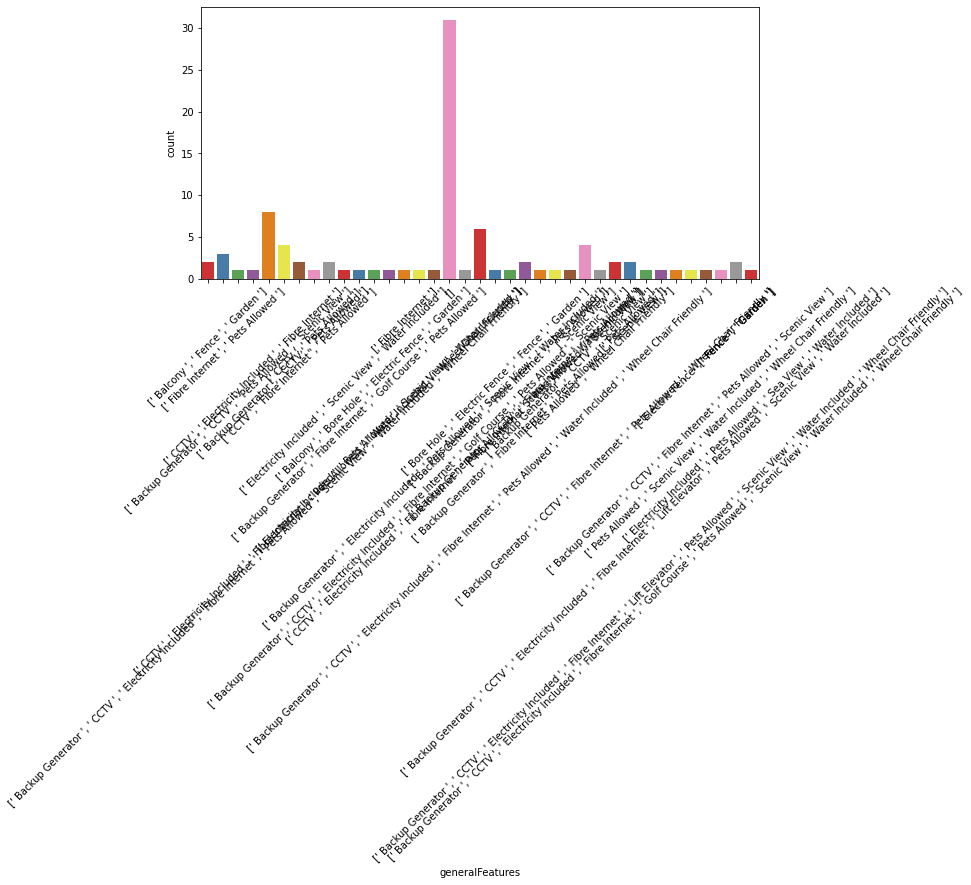

In [ ]:

plt.figure(figsize=(10,5))
chart = sns.countplot(
    
    x=df['generalFeatures'],
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

The features as they are do not provide the needed value and as such we will split them into distinct columns and indicate whether or not the house has the said features. It is for this reason we did not drop the columns with no features. This also solves the problem of having features mixed up during webscrapping. Also, the lists have been stored as strings instead of lists. We need to first convert them to lists

In [ ]:
# convert to lists
from ast import literal_eval
df.loc[:,'generalFeatures'] = df.loc[:,'generalFeatures'].apply(lambda x: literal_eval(x))
df.loc[:,'internalFeatures'] = df.loc[:,'internalFeatures'].apply(lambda x: literal_eval(x))
df.loc[:,'externalFeatures'] = df.loc[:,'externalFeatures'].apply(lambda x: literal_eval(x))

In [ ]:
all_features =set([]) 

def get_all_features(text):
  for i in range(len(text)):
  
   all_features.add(text[i].strip())


for i in range(length_of_df):
  get_all_features(df['generalFeatures'][i])
  get_all_features(df['internalFeatures'][i])
  get_all_features(df['externalFeatures'][i])


print("All features ", type(all_features),  all_features)


All features  <class 'set'> {'Electric Fence', 'Built in Cupboards', 'Pets Allowed', 'Fence', 'CCTV', 'Sea View', 'Golf Course', 'Backup Generator', 'Lift Elevator', 'Walk In Closet', 'Water Included', 'Kitchen', 'Aircon', 'Electricity Included', 'Bore Hole', 'Wheel Chair Friendly', 'Balcony', 'Fibre Internet', 'Alarm', 'Garden', 'Scenic View', 'Ensuite'}


We first need to turn the features to individual column names with intial values of zero. Then iterate trhough the df giving a 1 to a house that has a feature.

In [ ]:
# turn all features to column names
for feature in all_features:
  df[feature] = [0] * length_of_df
 
df.head(2)  

,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,price,Electric Fence,Built in Cupboards,Pets Allowed,Fence,CCTV,Sea View,Golf Course,Backup Generator,Lift Elevator,Walk In Closet,Water Included,Kitchen,Aircon,Electricity Included,Bore Hole,Wheel Chair Friendly,Balcony,Fibre Internet,Alarm,Garden,Scenic View,Ensuite
0,2428,8,6,"[ Built in Cupboards , Ensuite , Kitchen ]","[ Balcony , Fence , Garden ]",[],85000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6001,3,4,"[ Fence , Garden ]","[ Fibre Internet , Pets Allowed ]","[ Alarm , Built in Cupboards , Ensuite , Ki...",75000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def populate_feature( j, text):
   for i in range(len(text)):
     a = text[i].strip()
   
     df[a][j] = 1

for i in range(length_of_df):
  populate_feature(i ,df['generalFeatures'][i])
  populate_feature(i , df['internalFeatures'][i])
  populate_feature(i ,df['externalFeatures'][i])

df.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,price,Electric Fence,Built in Cupboards,Pets Allowed,Fence,CCTV,Sea View,Golf Course,Backup Generator,Lift Elevator,Walk In Closet,Water Included,Kitchen,Aircon,Electricity Included,Bore Hole,Wheel Chair Friendly,Balcony,Fibre Internet,Alarm,Garden,Scenic View,Ensuite
0,2428,8,6,"[ Built in Cupboards , Ensuite , Kitchen ]","[ Balcony , Fence , Garden ]",[],85000000,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
1,6001,3,4,"[ Fence , Garden ]","[ Fibre Internet , Pets Allowed ]","[ Alarm , Built in Cupboards , Ensuite , Ki...",75000000,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1


We can now drop the lists columns

In [ ]:
df.drop(['generalFeatures','externalFeatures', 'internalFeatures'],axis=1)

,area,baths,beds,price,Electric Fence,Built in Cupboards,Pets Allowed,Fence,CCTV,Sea View,Golf Course,Backup Generator,Lift Elevator,Walk In Closet,Water Included,Kitchen,Aircon,Electricity Included,Bore Hole,Wheel Chair Friendly,Balcony,Fibre Internet,Alarm,Garden,Scenic View,Ensuite
0,2428,8,6,85000000,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
1,6001,3,4,75000000,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1
2,800,5,5,340000,1,1,1,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,1,1,1
3,2833,5,5,150000000,1,1,0,1,1,0,0,0,0,1,0,1,0,1,1,0,1,1,1,1,0,1
4,2023,8,8,150000000,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2000,6,5,150000000,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
90,2023,8,6,200000000,1,1,1,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,1
91,2023,7,7,150000000,1,1,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,1
92,2023,4,4,83000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Our price being the target variable needs to be at the end

In [ ]:
df1 = df.pop('price')
df['price']  = df1
df.head(2)

,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,Electric Fence,Built in Cupboards,Pets Allowed,Fence,CCTV,Sea View,Golf Course,Backup Generator,Lift Elevator,Walk In Closet,Water Included,Kitchen,Aircon,Electricity Included,Bore Hole,Wheel Chair Friendly,Balcony,Fibre Internet,Alarm,Garden,Scenic View,Ensuite,price
0,2428,8,6,"[ Built in Cupboards , Ensuite , Kitchen ]","[ Balcony , Fence , Garden ]",[],0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,85000000
1,6001,3,4,"[ Fence , Garden ]","[ Fibre Internet , Pets Allowed ]","[ Alarm , Built in Cupboards , Ensuite , Ki...",0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,75000000


#  EXPLORATORY DATA ANALYSIS

We need to make sure that our data is now cleaned

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   area                  94 non-null     int64 
 1   baths                 94 non-null     int64 
 2   beds                  94 non-null     int64 
 3   externalFeatures      94 non-null     object
 4   generalFeatures       94 non-null     object
 5   internalFeatures      94 non-null     object
 6   Electric Fence        94 non-null     int64 
 7   Built in Cupboards    94 non-null     int64 
 8   Pets Allowed          94 non-null     int64 
 9   Fence                 94 non-null     int64 
 10  CCTV                  94 non-null     int64 
 11  Sea View              94 non-null     int64 
 12  Golf Course           94 non-null     int64 
 13  Backup Generator      94 non-null     int64 
 14  Lift Elevator         94 non-null     int64 
 15  Walk In Closet        94 non-null     int6

In [ ]:
df.shape

(94, 29)

Our dataset has 94 data points with 29 columns. We have 28 features and on target variable the price .

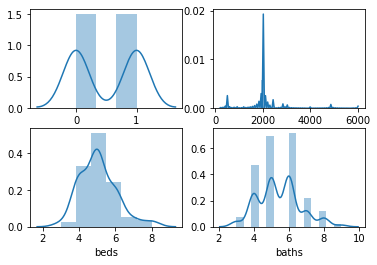

In [ ]:
import math
# all_numerical = ['Sea View', 'Kitchen', 'Lift Elevator', 'Water Included', 'Balcony', 'Garden', 'Wheel Chair Friendly', 'Fence', 'Golf Course', 'Scenic View', 'CCTV', 'Walk In Closet', 'Alarm', 'Backup Generator', 'Electric Fence', 'Fibre Internet', 'Aircon', 'Electricity Included', 'Pets Allowed', 'Built in Cupboards', 'Ensuite', 'Bore Hole','price','area','beds','baths']
all_numerical = [ 'Balcony','area','beds','baths']

# this plots multiple seaborn histograms on different subplots.
#
def plot_multiple_histograms(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.distplot(df[col], kde=True, ax=axs)
            else:
                sns.distplot(df[col], kde=True, ax=axs[j])
        else:
            sns.distplot(df[col], kde=True, ax=axs[i, j])

            
plot_multiple_histograms(df,all_numerical)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,94.0,2.024862e+03,8.604055e+02,186.0,2023.0,2024.0,2.024000e+03,6001.0
baths,94.0,5.436170e+00,1.223063e+00,3.0,5.0,5.0,6.000000e+00,9.0
beds,94.0,5.063830e+00,1.013972e+00,3.0,4.0,5.0,6.000000e+00,8.0
Electric Fence,94.0,5.638298e-01,4.985681e-01,0.0,0.0,1.0,1.000000e+00,1.0
Built in Cupboards,94.0,6.489362e-01,4.798621e-01,0.0,0.0,1.0,1.000000e+00,1.0
Pets Allowed,94.0,5.106383e-01,5.025672e-01,0.0,0.0,1.0,1.000000e+00,1.0
Fence,94.0,5.638298e-01,4.985681e-01,0.0,0.0,1.0,1.000000e+00,1.0
CCTV,94.0,3.829787e-01,4.887197e-01,0.0,0.0,0.0,1.000000e+00,1.0
Sea View,94.0,1.063830e-02,1.031421e-01,0.0,0.0,0.0,0.000000e+00,1.0
Golf Course,94.0,3.191489e-02,1.767160e-01,0.0,0.0,0.0,0.000000e+00,1.0


What is the relationship between area and price?

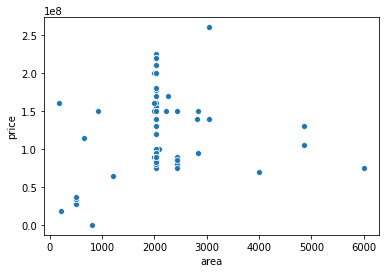

In [ ]:
sns.scatterplot(x=df['area'], y=df['price']);

from the above, most houses are within the same area. From skiming throught the data one can see that most of the houses are on half an acre as can be shown on the scatterplot. 

What is the relationship between number of bathrooms and price?

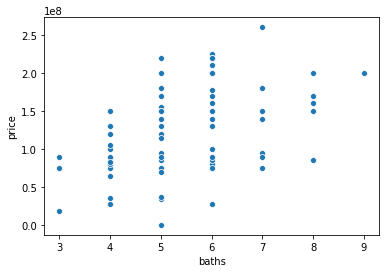

In [ ]:
sns.scatterplot(x=df['baths'], y=df['price']);

Naturally the more the bathrooms the pricier the house. 

# MODEL BUILDING

In this task we will use linear regression and neural networks to determine the price of a house in runda.

1 . SPLIT DATA INTO TEST AND TRAINING SET

Data needs to be split in testing and training sets to avoid overfitting

In [ ]:
from sklearn.model_selection import train_test_split

The data needs to be split into the features and the target variable. We are using all features to describe the price of a house.

In [ ]:
all_numerical = ['Sea View', 'Kitchen', 'Lift Elevator', 'Water Included', 'Balcony', 'Garden', 'Wheel Chair Friendly', 'Fence', 'Golf Course', 'Scenic View', 'CCTV', 'Walk In Closet', 'Alarm', 'Backup Generator', 'Electric Fence', 'Fibre Internet', 'Aircon', 'Electricity Included', 'Pets Allowed', 'Built in Cupboards', 'Ensuite', 'Bore Hole','price','area','beds','baths']
# X - features
num_of_columns = len(df.columns)
a =num_of_columns-1
X = df[['Sea View', 'Kitchen', 'Lift Elevator', 'Water Included', 'Balcony', 'Garden', 'Wheel Chair Friendly', 'Fence', 'Golf Course', 'Scenic View', 'CCTV', 'Walk In Closet', 'Alarm', 'Backup Generator', 'Electric Fence', 'Fibre Internet', 'Aircon', 'Electricity Included', 'Pets Allowed', 'Built in Cupboards', 'Ensuite', 'Bore Hole','area','beds','baths']]

print("X shape" , X.shape)
# y price
y = df['price']
print("y shape" , y.shape)


X shape (94, 25)
y shape (94,)


In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear Regression



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Sea View,8.371216e+07
Kitchen,3.026551e+07
Lift Elevator,5.529048e+07
Water Included,4.408421e+07
Balcony,1.398452e+07
Garden,-7.111794e+06
Wheel Chair Friendly,7.944083e+07
Fence,-2.379128e+07
Golf Course,2.138513e+07
Scenic View,-6.009416e+06


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df0 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df0.head(25)
df1

,Actual,Predicted
40,225000000,1.124441e+08
22,37000000,1.617482e+08
55,37000000,6.601671e+07
72,105000000,1.246503e+08
0,85000000,1.579052e+08
26,70000000,1.390082e+08
39,178000000,1.124441e+08
67,80000000,6.826347e+07
10,140000000,5.071335e+07
44,180000000,1.124341e+08


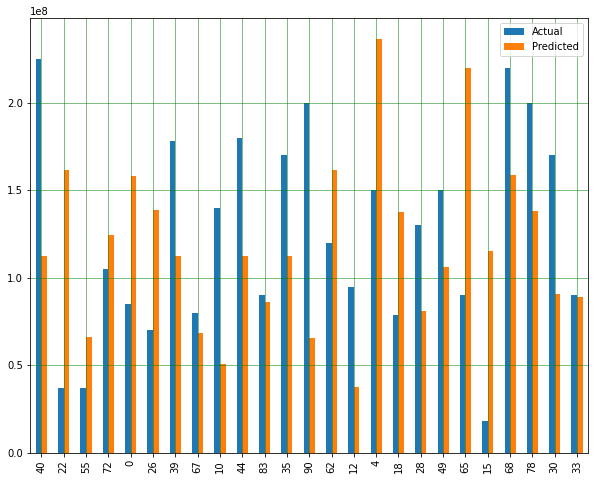

In [ ]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 64197566.56853049
Mean Squared Error: 5450239966979054.0
Root Mean Squared Error: 73825740.54473856


## Neural Networks

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0
   0  0]
 [ 0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MODEL ANALYSIS

# CONCLUSION